In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

In [359]:
aggregate_df = pd.read_csv("indices.csv")
aggregate_df.fillna(0, inplace=True)

# set all dtypes to float
for col in aggregate_df.columns[1:]:
    print(col)
    aggregate_df[col] = aggregate_df[col].astype(float)


Ladder score
EPI.new
S2: Refugees and IDPs
E2: Economic Inequality
P1: State Legitimacy
X1: External Intervention
P3: Human Rights
Unnamed: 2
Exports
Imports
GDP
Consumer Price Index
ACCESS TO COUNTRIES
Year_x
Quality of Life Index
Purchasing Power Index
Safety Index
Health Care Index
Cost of Living Index
Property Price to Income Ratio
Traffic Commute Time Index
Pollution Index
Climate Index
Year_y


In [360]:
aggregate_df

,Country,Ladder score,EPI.new,S2: Refugees and IDPs,E2: Economic Inequality,P1: State Legitimacy,X1: External Intervention,P3: Human Rights,Unnamed: 2,Exports,...,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year_y
0,togo,4.2141,34.0,5.7,8.1,7.6,5.3,6.4,0.547,133.585410,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,new caledonia,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,139.136662,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,viet nam,0.0000,20.1,0.0,0.0,0.0,0.0,0.0,0.726,207.281059,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3,pakistan,4.6567,24.6,7.6,4.9,7.4,8.3,7.5,0.540,128.203271,...,105.14,27.28,56.14,60.52,21.59,12.62,37.80,73.36,73.63,2021.0
4,ireland,6.8380,57.4,1.6,1.8,0.5,1.0,1.6,0.950,154.277950,...,150.89,73.84,54.98,52.78,83.11,7.40,37.70,33.59,89.13,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,austria,6.9047,66.5,4.5,2.5,0.6,0.3,0.4,0.926,132.788818,...,182.37,78.23,74.77,78.40,75.49,10.40,25.68,19.20,77.79,2021.0
214,djibouti,0.0000,47.5,7.1,7.2,8.8,7.6,7.9,0.515,2455.365745,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
215,india,4.0541,18.9,4.1,5.8,4.5,3.9,7.5,0.644,147.573248,...,104.52,47.13,55.28,66.25,25.16,11.31,46.66,79.62,65.30,2021.0
216,tuvalu,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.653,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [361]:
aggregate_df["ACCESS TO COUNTRIES"] = aggregate_df["ACCESS TO COUNTRIES"].astype(float) * -1
aggregate_df = aggregate_df.rename(columns={"ACCESS TO COUNTRIES": "Immobility"})
# Rename EPI.new to Environmental Health
# S2: Refugees and IDPs to Refugess and IDPs
# X1: External Intervention to External Intervention
# E2: Economic Inequality to Economic Inequality
# P3: Human Rights to Human Rights
# Unamed: 2 to Human Development
# Ladder Score to Happiness
aggregate_df = aggregate_df.rename(columns={"EPI.new": "Environmental Health", "S2: Refugees and IDPs": "Refugees and IDPs", "X1: External Intervention": "External Intervention", "E2: Economic Inequality": "Economic Inequality", "P3: Human Rights": "Human Rights", "Unnamed: 2": "Human Development", "Ladder score": "Happiness", "P1: State Legitimacy":"State Legitimacy"}) 

# Remove the Index in Quality of Life Index and Health Care Index
aggregate_df = aggregate_df.rename(columns={"Quality of Life Index": "Quality of Life", "Health Care Index": "Health Care"})

In [362]:
wellness_indexes = ["Quality of Life", "Health Care", "Happiness", "Imports", "Exports"]
poorness_indexes = ["State Legitimacy", "External Intervention", "Economic Inequality",  "Human Rights","Immobility"]
custom_wellness = ["Quality of Life", "Consumer Price Index", "Health Care", "Happiness"]

for variable in wellness_indexes:
    indices = [] 
    for index, row in aggregate_df.iterrows():
        if row[variable] != 0:
            indices.append(index)
    variable_df = aggregate_df[variable]
    variable_df = variable_df[indices]
    variable_df = variable_df.rank(pct=True)
    aggregate_df.loc[indices, variable] = variable_df

for variable in poorness_indexes:
    indices = [] 
    for index, row in aggregate_df.iterrows():
        if row[variable] != 0:
            indices.append(index)
    variable_df = aggregate_df[variable]
    variable_df = variable_df[indices]
    variable_df = variable_df.rank(pct=True)
    aggregate_df.loc[indices, variable] = variable_df
    
poorness_df_2021 = aggregate_df[poorness_indexes]
wellness_df_2021 = aggregate_df[wellness_indexes]
aggregate_df = aggregate_df[poorness_indexes + wellness_indexes]

In [363]:
aggregate_df

,State Legitimacy,External Intervention,Economic Inequality,Human Rights,Immobility,Quality of Life,Health Care,Happiness,Imports,Exports
0,0.735669,0.538217,0.914013,0.614650,0.813953,0.000000,0.000000,0.134921,0.336634,0.514851
1,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.212871,0.603960
2,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.970297,0.930693
3,0.691083,0.929936,0.468153,0.780255,0.988372,0.246575,0.369863,0.253968,0.861386,0.435644
4,0.082803,0.098726,0.035032,0.127389,0.078488,0.664384,0.123288,0.873016,0.806931,0.727723
...,...,...,...,...,...,...,...,...,...,...
213,0.095541,0.006369,0.105096,0.015924,0.058140,0.945205,0.945205,0.896825,0.683168,0.500000
214,0.863057,0.850318,0.761146,0.856688,0.906977,0.000000,0.000000,0.000000,1.000000,1.000000
215,0.375796,0.369427,0.595541,0.780255,0.747093,0.219178,0.520548,0.119048,0.732673,0.663366
216,0.000000,0.000000,0.000000,0.000000,0.421512,0.000000,0.000000,0.000000,0.000000,0.000000


In [364]:
aggregate_df.sum(axis=1).value_counts()

0.000000    6
1.247525    2
0.316832    2
0.509901    2
4.602907    1
           ..
4.708867    1
4.387360    1
4.931429    1
6.395822    1
1.742894    1
Length: 210, dtype: int64

In [365]:
poorness_df_2021

,State Legitimacy,External Intervention,Economic Inequality,Human Rights,Immobility
0,0.735669,0.538217,0.914013,0.614650,0.813953
1,0.000000,0.000000,0.000000,0.000000,-0.000000
2,0.000000,0.000000,0.000000,0.000000,-0.000000
3,0.691083,0.929936,0.468153,0.780255,0.988372
4,0.082803,0.098726,0.035032,0.127389,0.078488
...,...,...,...,...,...
213,0.095541,0.006369,0.105096,0.015924,0.058140
214,0.863057,0.850318,0.761146,0.856688,0.906977
215,0.375796,0.369427,0.595541,0.780255,0.747093
216,0.000000,0.000000,0.000000,0.000000,0.421512


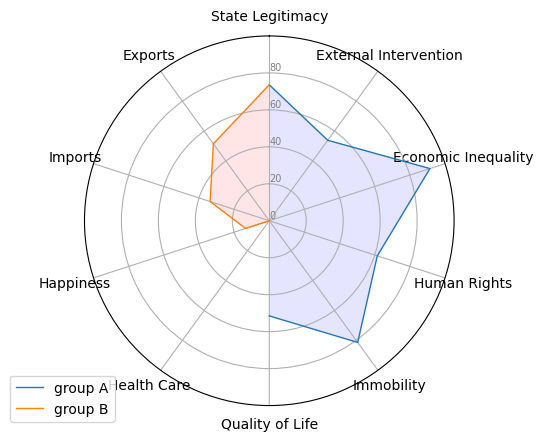

In [366]:
# Radar Plot of Poorness Index
categories = list(poorness_df_2021)
w_categories = list(wellness_df_2021)
both_categories = categories + w_categories
categories = both_categories
N = len(categories)
angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# X_ticks
plt.xticks(angles[:-1], categories)

# Y ticks
ax.set_rlabel_position(0)
plt.yticks([0, .20,.40,.60,.80], ["0","20","40","60","80"], color="grey", size=7)
plt.ylim(0,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values = poorness_df_2021.iloc[0].values.flatten().tolist()
w_values = wellness_df_2021.iloc[0].values.flatten().tolist()
values += [w_values[-1]]
ax.plot(angles[:6], values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles[:6], values, 'b', alpha=0.1)
 
# Ind2
w_values += [values[0]]
ax.plot(angles[5:], w_values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles[5:], w_values, 'r', alpha=0.1)

 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [367]:
w_values

[0.0,
 0.0,
 0.1349206349206349,
 0.33663366336633666,
 0.5148514851485149,
 0.7356687898089171]

In [368]:
values

[0.7356687898089171,
 0.5382165605095541,
 0.9140127388535032,
 0.6146496815286624,
 0.813953488372093,
 0.5148514851485149]

In [369]:
len(poorness_indexes)

5

In [396]:
def radar(wellness_row, poorness_row):
    values = poorness_row.values.flatten().tolist()
    w_values = wellness_row.values.flatten().tolist()
    values += [w_values[-1]]
    ax.plot(angles[:len(poorness_indexes)+1], values, linewidth=1, linestyle='solid', label="group A", color="black", alpha=0.1)
    ax.fill(angles[:len(poorness_indexes)+1], values, 'b', alpha=0.025)
    
    w_values += [values[0]]
    ax.plot(angles[len(poorness_indexes):], w_values, linewidth=1, linestyle='solid', label="group B", color="black", alpha=0.1)
    ax.fill(angles[len(poorness_indexes):], w_values, 'r', alpha=0.025)

87


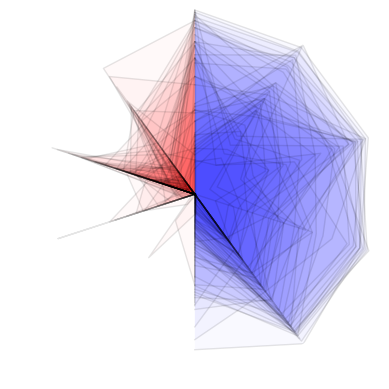

In [401]:
aggregate_df_2021 = aggregate_df

# Radar Plot of Poorness Index
categories = list(poorness_df_2021)
w_categories = list(wellness_df_2021)
both_categories = categories + w_categories
categories = both_categories
N = len(categories)
angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# X_ticks
plt.xticks(angles[:-1], categories)

# Y ticks
ax.set_rlabel_position(0)
# plt.yticks([0, .20,.40,.60,.80], ["0","20","40","60","80"], color="white", size=7)
plt.ylim(0,1)

# Remove the lines
ax.spines['polar'].set_visible(False)
# Remove the inner lines the circular lines of the polar plot
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_yticks([])
ax.set_xticks([])

tot = 0
for index, row in aggregate_df_2021.iterrows():
    # if the row[wellness_index] has all 0's radar it
    if row[wellness_indexes].sum() < 1:
        tot += 1
        radar(wellness_df_2021.loc[index], poorness_df_2021.loc[index])
print(tot)

plt.savefig("radar_plot.png", transparent=True, dpi=300, bbox_inches='tight')

46


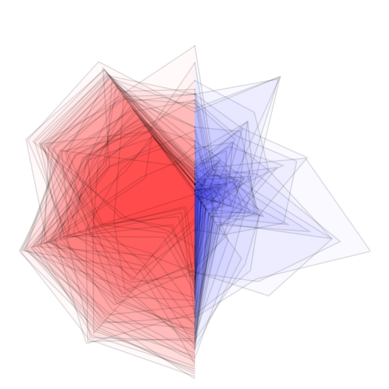

In [400]:
aggregate_df_2021 = aggregate_df


# Radar Plot of Poorness Index
categories = list(poorness_df_2021)
w_categories = list(wellness_df_2021)
both_categories = categories + w_categories
categories = both_categories
N = len(categories)
angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# # X_ticks
# plt.xticks(angles[:-1], categories)

# Y ticks
ax.set_rlabel_position(0)
# plt.yticks([0, .20,.40,.60,.80], ["0","20","40","60","80"], color="white", size=7)
plt.ylim(0,1)

# Remove the lines
ax.spines['polar'].set_visible(False)
# Remove the inner lines the circular lines of the polar plot
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_yticks([])
ax.set_xticks([])

tot = 0
for index, row in aggregate_df_2021.iterrows():
    # if the row[wellness_index] has all 0's radar it
    if row[wellness_indexes].sum() != 0 and wellness_df_2021.loc[index].sum() > 2.5:
        tot += 1
        radar(wellness_df_2021.loc[index], poorness_df_2021.loc[index])
print(tot)

plt.savefig("poorness_wellness.png", transparent=True, dpi=300)

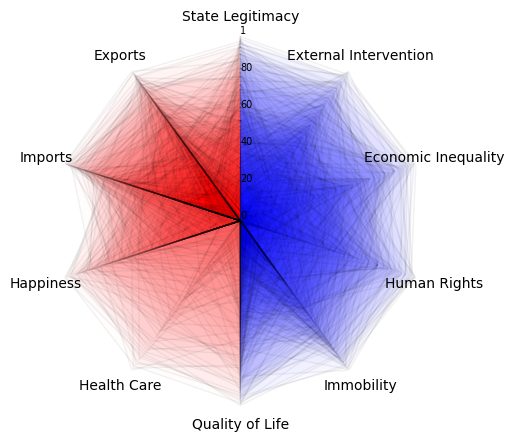

In [385]:
aggregate_df_2021


# Radar Plot of Poorness Index
categories = list(poorness_df_2021)
w_categories = list(wellness_df_2021)
both_categories = categories + w_categories
categories = both_categories
N = len(categories)
angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# X_ticks
plt.xticks(angles[:-1], categories)

# Y ticks
ax.set_rlabel_position(0)
plt.yticks([0, .20,.40,.60,.80,1], ["0","20","40","60","80","1"], color="black", size=7)
plt.ylim(0,1)

# Remove the lines
ax.spines['polar'].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

tot = 0
for index, row in aggregate_df_2021.iterrows():
    # if the row[wellness_index] has all 0's radar it
    radar(wellness_df_2021.loc[index], poorness_df_2021.loc[index])

# save transparent and high quality
plt.savefig("poorness_wellness.png", transparent=True, dpi=300)